#   Time-series based Binary classificaiton on Industrial data
#### In this NoteBook we will start by analyzing data and make sure the distribution is acceptable to train, then we will try the most known ML algorithms and compare their results to see which algorithm will give us the best result.

### Reading Data and Converting to CSV Format 

In [1]:
import pandas as pd 
  

read_file = pd.read_excel ("M420_machine_data.xlsx") 
  
read_file.to_csv ("converted_data.csv",  
                  index = None, 
                  header=True) 
    
data = pd.DataFrame(pd.read_csv("converted_data.csv")) 
data

,Machine,Monitor,From,To,Total Acceleration Min ((m/s²)²),Total Acceleration Max ((m/s²)²),Total Acceleration Avg ((m/s²)²),Horizontal Velocity Min (mm/s),Horizontal Velocity Max (mm/s),Horizontal Velocity Avg (mm/s),...,Vertical Velocity Min (mm/s),Vertical Velocity Max (mm/s),Vertical Velocity Avg (mm/s),Temperature Min (°C),Temperature Max (°C),Temperature Avg (°C),Audio Min (dB),Audio Max (dB),Audio Avg (dB),Arıza
0,M420,M420 Dişli Grubu,2023-03-17 00:00:00,2023-03-17 00:01:00,10224,10317,10271,133,150,143,...,91,107,99,7169,7172,7170,7412,7483,7443,0
1,M420,M420 Dişli Grubu,2023-03-17 00:01:00,2023-03-17 00:02:00,10227,10287,10261,128,157,142,...,90,101,96,7167,7169,7168,7419,7522,7464,0
2,M420,M420 Dişli Grubu,2023-03-17 00:02:00,2023-03-17 00:03:00,10222,10333,10270,135,154,148,...,90,98,93,7166,7168,7167,7453,7501,7467,0
3,M420,M420 Dişli Grubu,2023-03-17 00:03:00,2023-03-17 00:04:00,10249,10348,10287,140,163,149,...,86,108,99,7164,7167,7166,7418,7460,7443,0
4,M420,M420 Dişli Grubu,2023-03-17 00:04:00,2023-03-17 00:05:00,10214,10321,10268,131,152,142,...,85,108,95,7165,7166,7166,7407,7508,7460,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30631,M420,M420 Dişli Grubu,2023-04-29 23:37:00,2023-04-29 23:38:00,10206,10405,10320,156,177,166,...,97,129,110,6785,6787,6785,8010,8116,8053,0
30632,M420,M420 Dişli Grubu,2023-04-29 23:38:00,2023-04-29 23:39:00,10292,10352,10330,159,171,163,...,102,133,113,6788,6790,6790,7992,8046,8025,0
30633,M420,M420 Dişli Grubu,2023-04-29 23:39:00,2023-04-29 23:40:00,10250,10372,10297,167,182,175,...,105,138,118,6790,6791,6790,7998,8124,8038,0
30634,M420,M420 Dişli Grubu,2023-04-29 23:40:00,2023-04-29 23:41:00,10252,10363,10302,142,176,164,...,95,128,109,6793,6793,6793,7987,8062,8033,0


#   Preprocess data and drop the unwanted features

In [2]:
# İlk birkaç satırı görüntüleyin
print(data.head())


  Machine           Monitor                 From                   To  \
0    M420  M420 Dişli Grubu  2023-03-17 00:00:00  2023-03-17 00:01:00   
1    M420  M420 Dişli Grubu  2023-03-17 00:01:00  2023-03-17 00:02:00   
2    M420  M420 Dişli Grubu  2023-03-17 00:02:00  2023-03-17 00:03:00   
3    M420  M420 Dişli Grubu  2023-03-17 00:03:00  2023-03-17 00:04:00   
4    M420  M420 Dişli Grubu  2023-03-17 00:04:00  2023-03-17 00:05:00   

   Total Acceleration Min ((m/s²)²)  Total Acceleration Max ((m/s²)²)  \
0                             10224                             10317   
1                             10227                             10287   
2                             10222                             10333   
3                             10249                             10348   
4                             10214                             10321   

   Total Acceleration Avg ((m/s²)²)  Horizontal Velocity Min (mm/s)  \
0                             10271                

In [3]:
# Veri tipi bilgilerini inceleyin
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30636 entries, 0 to 30635
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Machine                           30636 non-null  object
 1   Monitor                           30636 non-null  object
 2   From                              30636 non-null  object
 3   To                                30636 non-null  object
 4   Total Acceleration Min ((m/s²)²)  30636 non-null  int64 
 5   Total Acceleration Max ((m/s²)²)  30636 non-null  int64 
 6   Total Acceleration Avg ((m/s²)²)  30636 non-null  int64 
 7   Horizontal Velocity Min (mm/s)    30636 non-null  int64 
 8   Horizontal Velocity Max (mm/s)    30636 non-null  int64 
 9   Horizontal Velocity Avg (mm/s)    30636 non-null  int64 
 10  Axial Velocity Min (mm/s)         30636 non-null  int64 
 11  Axial Velocity Max (mm/s)         30636 non-null  int64 
 12  Axial Velocity Avg

In [6]:
# Temel istatistikleri görüntüleyin
print(data.describe())


       Total Acceleration Min ((m/s²)²)  Total Acceleration Max ((m/s²)²)  \
count                      30636.000000                      30636.000000   
mean                       10333.885037                      10443.531793   
std                          182.009566                        193.763859   
min                         9519.000000                       9771.000000   
25%                        10197.000000                      10297.000000   
50%                        10273.000000                      10382.000000   
75%                        10492.000000                      10606.000000   
max                        10937.000000                      11291.000000   

       Total Acceleration Avg ((m/s²)²)  Horizontal Velocity Min (mm/s)  \
count                      30636.000000                    30636.000000   
mean                       10387.845737                      138.144895   
std                          186.144577                       24.000398   
min   

In [5]:
# Eksik değerleri kontrol edin
print(data.isna().sum())

Machine                             0
Monitor                             0
From                                0
To                                  0
Total Acceleration Min ((m/s²)²)    0
Total Acceleration Max ((m/s²)²)    0
Total Acceleration Avg ((m/s²)²)    0
Horizontal Velocity Min (mm/s)      0
Horizontal Velocity Max (mm/s)      0
Horizontal Velocity Avg (mm/s)      0
Axial Velocity Min (mm/s)           0
Axial Velocity Max (mm/s)           0
Axial Velocity Avg (mm/s)           0
Vertical Velocity Min (mm/s)        0
Vertical Velocity Max (mm/s)        0
Vertical Velocity Avg (mm/s)        0
Temperature Min (°C)                0
Temperature Max (°C)                0
Temperature Avg (°C)                0
Audio Min (dB)                      0
Audio Max (dB)                      0
Audio Avg (dB)                      0
Arıza                               0
dtype: int64


In [7]:
# Get the number of unique values in each column
unique_counts = data.nunique()

print(unique_counts)

Machine                                 1
Monitor                                 1
From                                30636
To                                  30636
Total Acceleration Min ((m/s²)²)      962
Total Acceleration Max ((m/s²)²)     1040
Total Acceleration Avg ((m/s²)²)      985
Horizontal Velocity Min (mm/s)        214
Horizontal Velocity Max (mm/s)        350
Horizontal Velocity Avg (mm/s)        263
Axial Velocity Min (mm/s)             780
Axial Velocity Max (mm/s)             993
Axial Velocity Avg (mm/s)             872
Vertical Velocity Min (mm/s)          272
Vertical Velocity Max (mm/s)          402
Vertical Velocity Avg (mm/s)          330
Temperature Min (°C)                 3318
Temperature Max (°C)                 3321
Temperature Avg (°C)                 3340
Audio Min (dB)                       2807
Audio Max (dB)                       2825
Audio Avg (dB)                       2810
Arıza                                   2
dtype: int64


#### Looking at the unique values looks like Machine and Monitor are always the same value, that's because the data has been taken for the same Industrial machinebut looks like we have to drop both of these features 

#   Veriyi Görselleştirme

## Zaman Serisi İndeksini Ayarlama

In [6]:
# Zaman serisi indeksini ayarlayın
data['From'] = pd.to_datetime(data['From'])
print(data['From'])
data['To'] = pd.to_datetime(data['To'])
data.set_index('From', inplace=True)

# İlk birkaç satırı yeniden görüntüleyin
print(data.head())


                    Machine           Monitor                  To  \
From                                                                
2023-03-17 00:00:00    M420  M420 Dişli Grubu 2023-03-17 00:01:00   
2023-03-17 00:01:00    M420  M420 Dişli Grubu 2023-03-17 00:02:00   
2023-03-17 00:02:00    M420  M420 Dişli Grubu 2023-03-17 00:03:00   
2023-03-17 00:03:00    M420  M420 Dişli Grubu 2023-03-17 00:04:00   
2023-03-17 00:04:00    M420  M420 Dişli Grubu 2023-03-17 00:05:00   

                     Total Acceleration Min ((m/s²)²)  \
From                                                    
2023-03-17 00:00:00                             10224   
2023-03-17 00:01:00                             10227   
2023-03-17 00:02:00                             10222   
2023-03-17 00:03:00                             10249   
2023-03-17 00:04:00                             10214   

                     Total Acceleration Max ((m/s²)²)  \
From                                                    
20

##  Zaman Serisi Özelliklerini İnceleme
####    Zaman serisi özelliklerini inceleyerek, her bir ölçümün zaman içindeki dağılımını görselleştirelim.

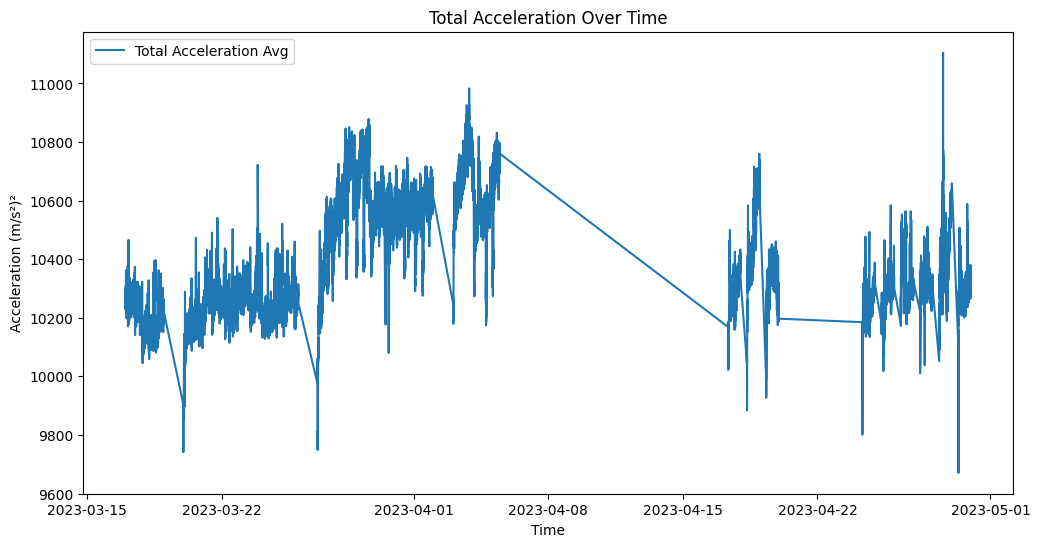

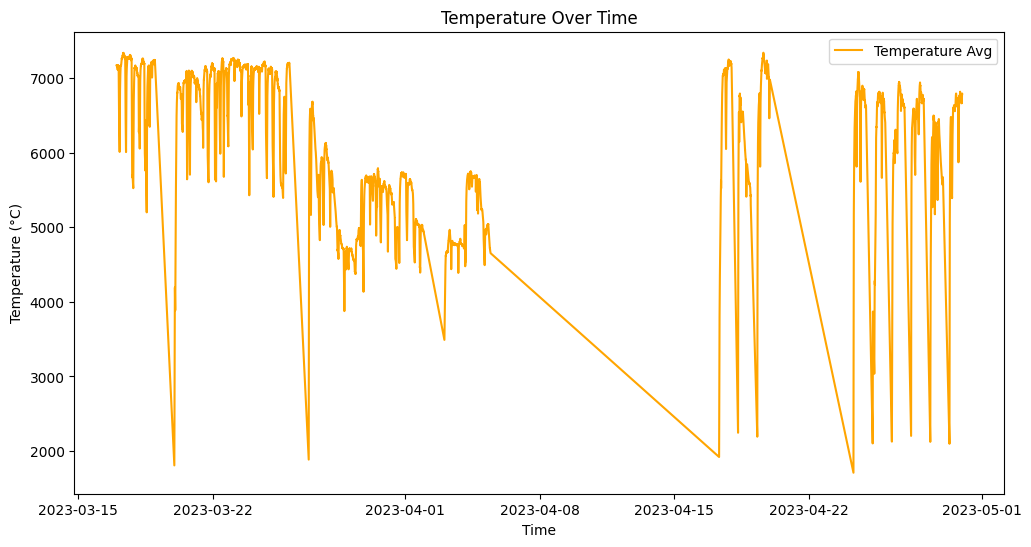

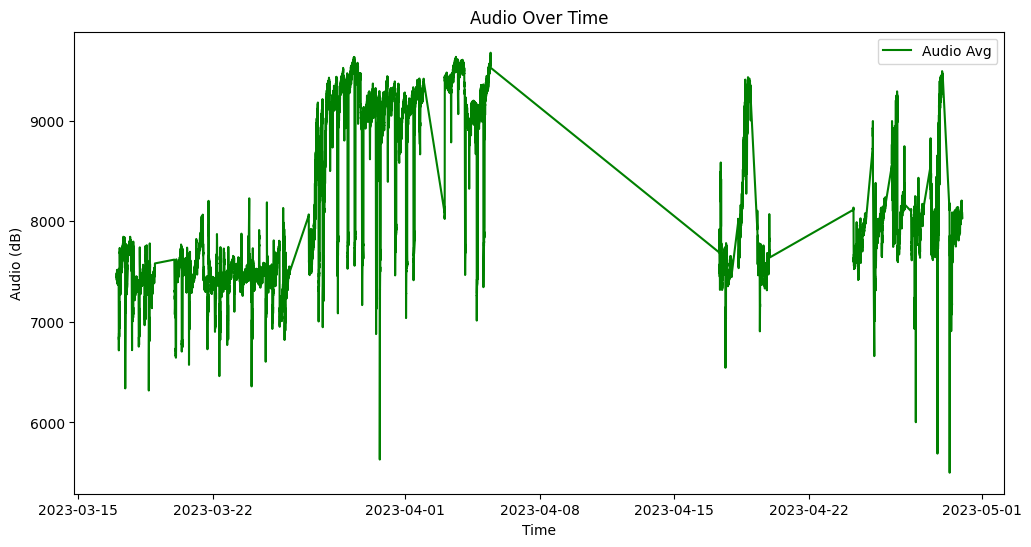

In [7]:
import matplotlib.pyplot as plt

# Toplam ivme ortalamasını görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total Acceleration Avg ((m/s²)²)'], label='Total Acceleration Avg')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)²')
plt.title('Total Acceleration Over Time')
plt.legend()
plt.show()

# Sıcaklık ortalamasını görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature Avg (°C)'], label='Temperature Avg', color='orange')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

# Ses ortalamasını görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Audio Avg (dB)'], label='Audio Avg', color='green')
plt.xlabel('Time')
plt.ylabel('Audio (dB)')
plt.title('Audio Over Time')
plt.legend()
plt.show()


## Özelliklerin Dağılımını İnceleme
### Her bir özellik için histogram ve kutu grafikleri oluşturarak dağılımlarını inceleyelim.

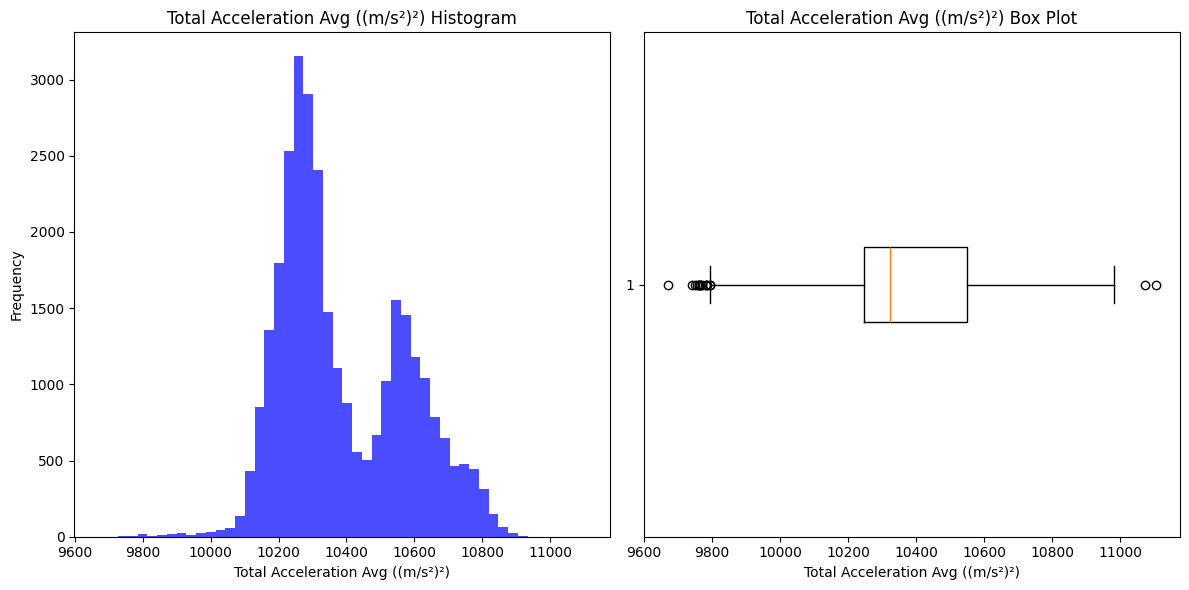

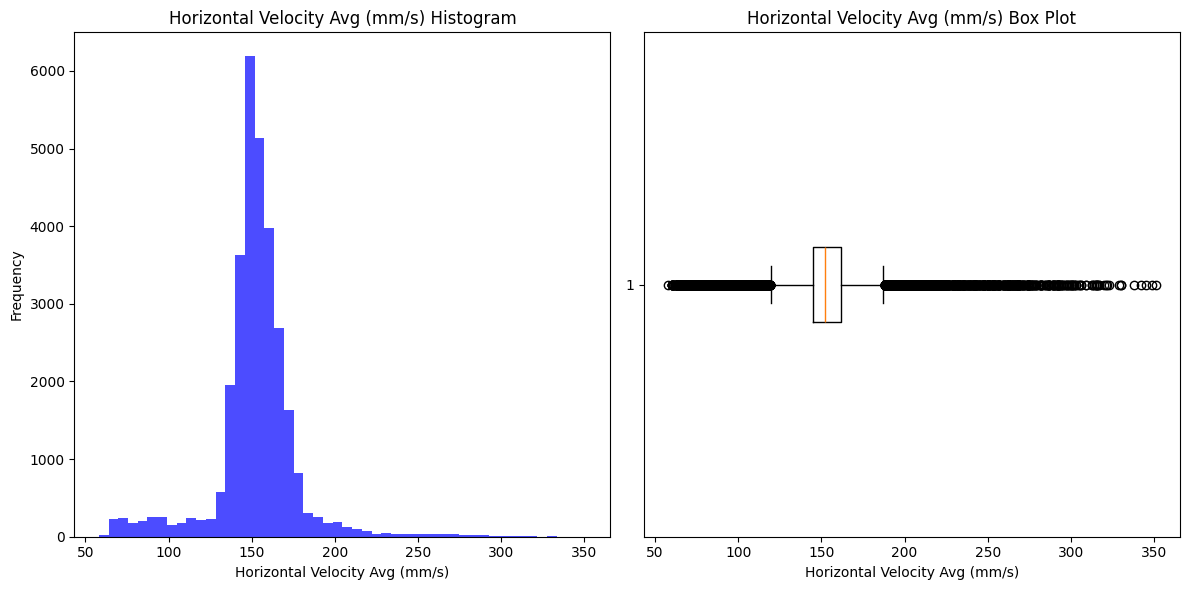

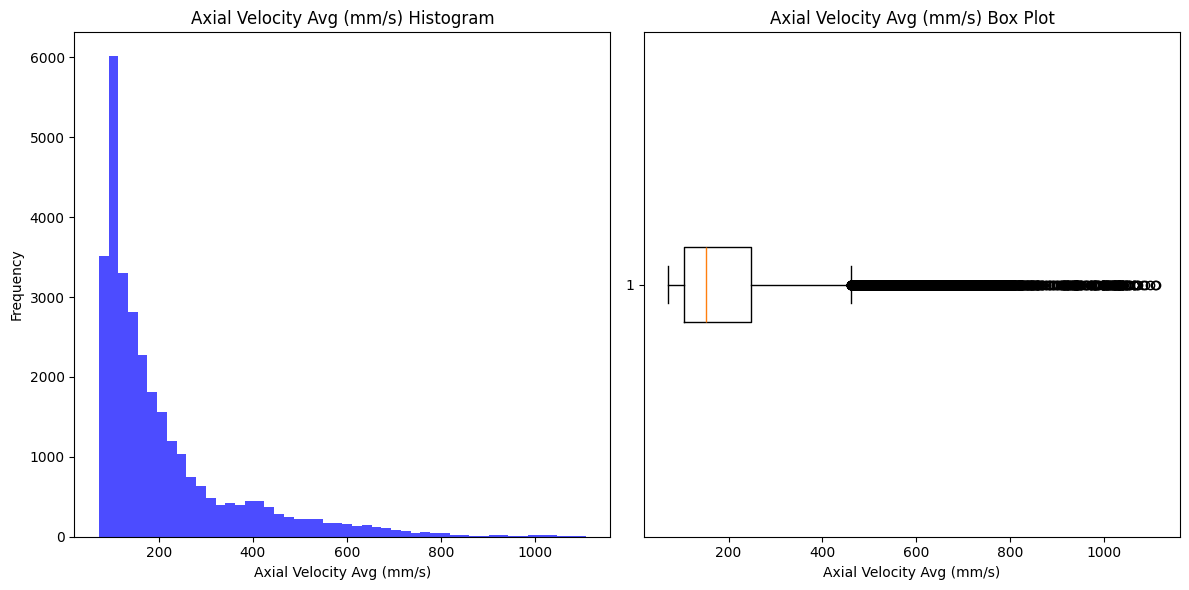

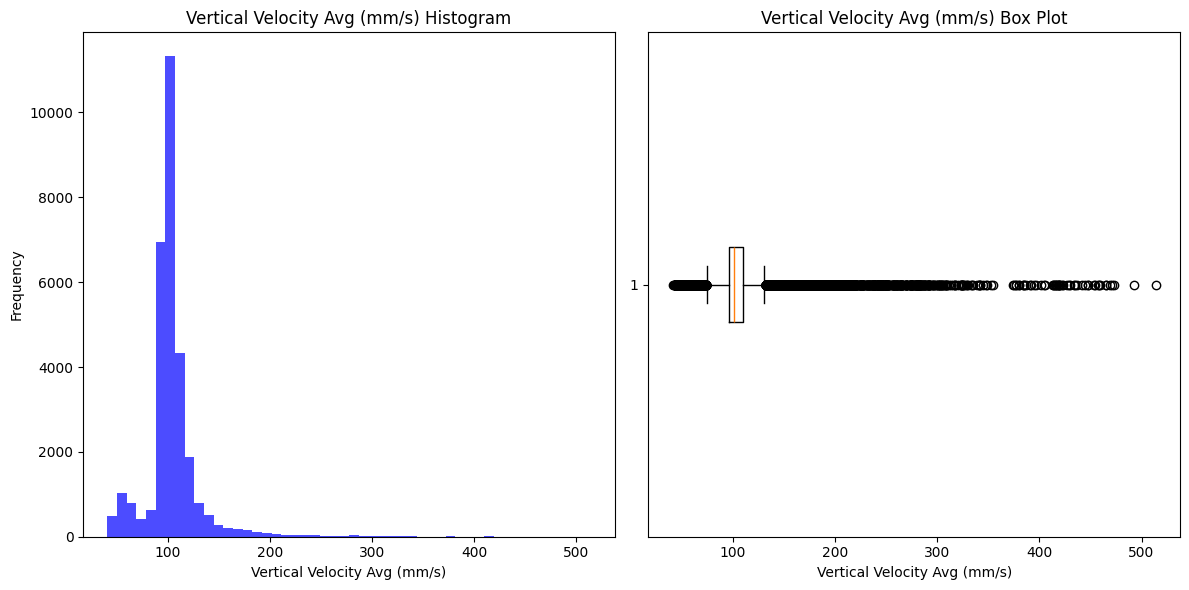

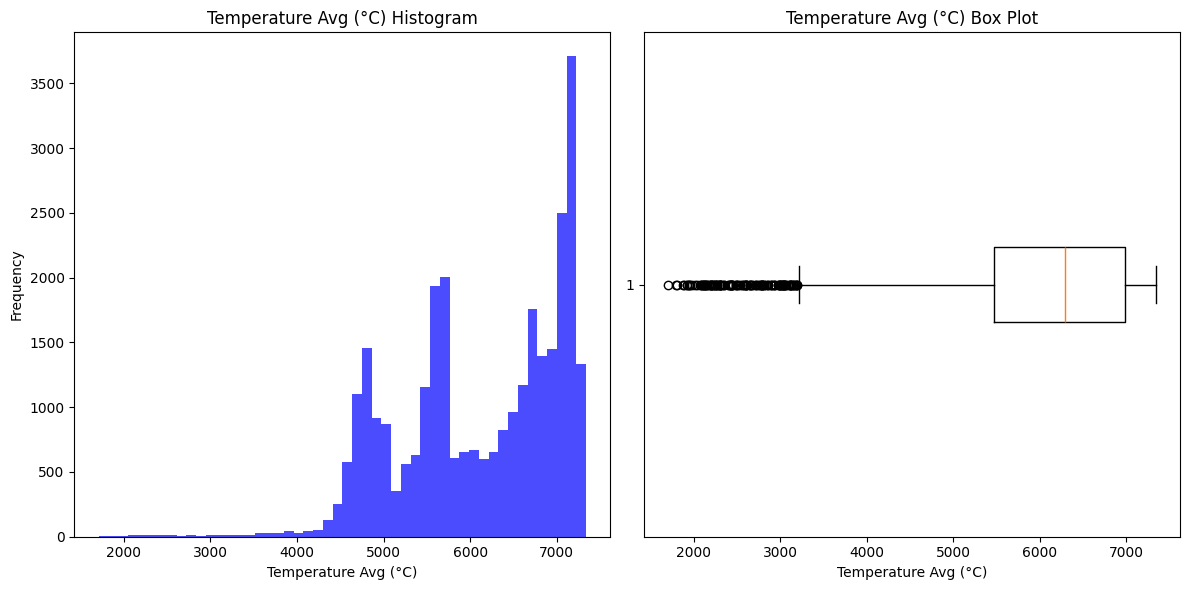

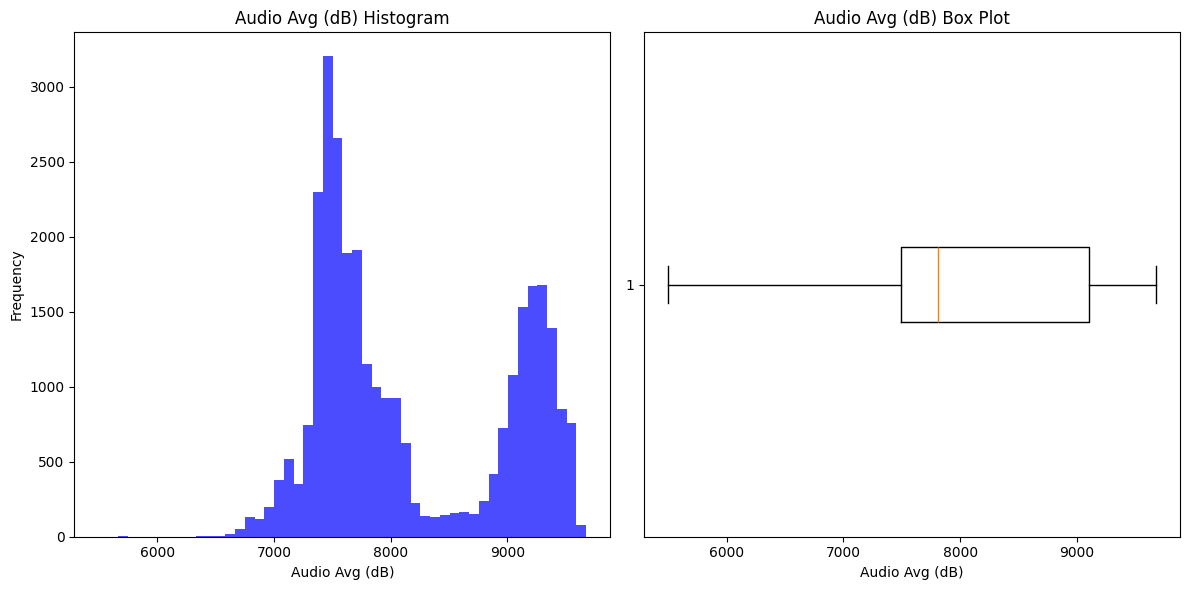

In [8]:
# Histogram ve kutu grafikleri
features = ['Total Acceleration Avg ((m/s²)²)', 'Horizontal Velocity Avg (mm/s)', 'Axial Velocity Avg (mm/s)', 'Vertical Velocity Avg (mm/s)', 'Temperature Avg (°C)', 'Audio Avg (dB)']

for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[feature], bins=50, color='blue', alpha=0.7)
    plt.title(f'{feature} Histogram')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Kutu grafiği
    plt.subplot(1, 2, 2)
    plt.boxplot(data[feature], vert=False)
    plt.title(f'{feature} Box Plot')
    plt.xlabel(feature)
    
    plt.tight_layout()
    plt.show()


##  Hedef Değerin Dağılımını İnceleme
### Hedef değer (Arıza) sınıflarının dağılımını inceleyelim.

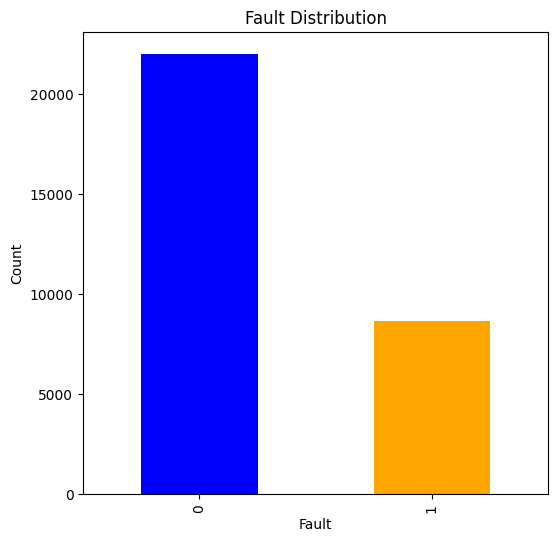

In [9]:
# Hedef değerin dağılımı
plt.figure(figsize=(6, 6))
data['Arıza'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Fault Distribution')
plt.xlabel('Fault')
plt.ylabel('Count')
plt.show()


##  Özellikler Arası Korelasyonu İnceleme
### Özellikler arası korelasyonu inceleyerek, hangi özelliklerin birbiriyle ilişkili olduğunu görelim.

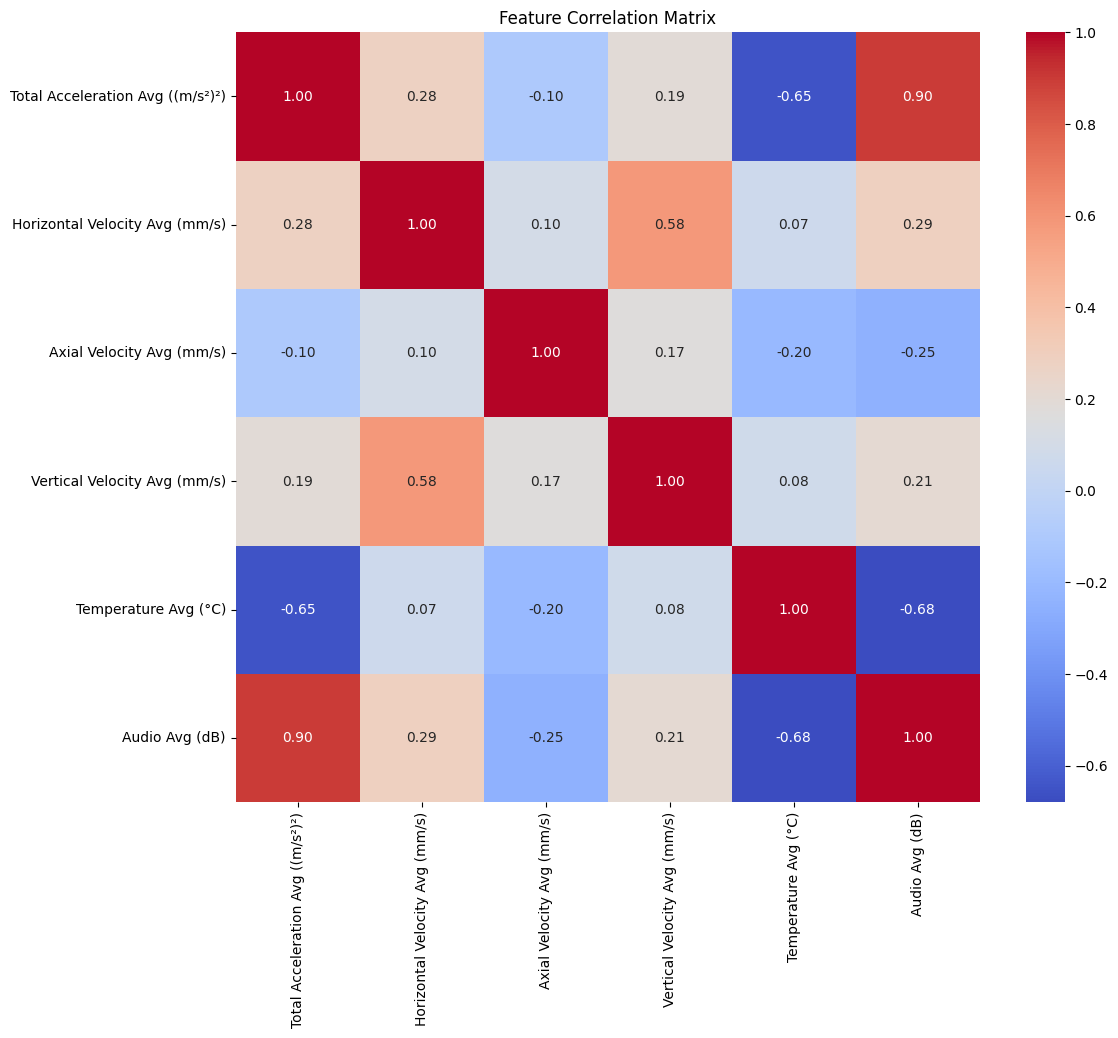

In [10]:
import seaborn as sns

# Korelasyon matrisi
plt.figure(figsize=(12, 10))
correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


## Veriye zaman serisi problemi için ön işlemenin yapılması

In [11]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


data = pd.read_csv('final_odev.csv')

# Zaman serisi indeksini ayarlayın
data['From'] = pd.to_datetime(data['From'])
data['To'] = pd.to_datetime(data['To'])

# Zaman bazlı özellikler oluşturma
data['From_hour'] = data['From'].dt.hour
data['From_minute'] = data['From'].dt.minute
data['From_second'] = data['From'].dt.second
data['To_hour'] = data['To'].dt.hour
data['To_minute'] = data['To'].dt.minute
data['To_second'] = data['To'].dt.second

# Hedef ve özellik sütunlarını ayırın
features = data.drop(columns=['Arıza', 'From', 'To'])
features['Machine'] = features['Machine'].astype('category').cat.codes
features['Monitor'] = features['Monitor'].astype('category').cat.codes
target = data['Arıza']

## Veriyi scale edip train test split yapılması

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Veriyi normalleştirme
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Eğitim ve test setlerine stratified ayırma
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, stratify=target, random_state=42)


## Hiper-parametre optimizasyonu yaparak Random forest algotiması ile eğitimin başlatılması

In [13]:
from sklearn.model_selection import GridSearchCV

# Random Forest modelini oluşturma
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Hiperparametre arama
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi parametreler ile modeli yeniden eğitme
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=300,
                       random_state=42)

## Eğitilen modelin test edilmesi. 
### Accuracy, Precision, Recall ve F1-score değerleri gösterilmektedir


In [14]:
# Modeli değerlendirme
y_pred = best_model.predict(X_test)

# Performans metrikleri
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6599
           1       0.97      0.96      0.97      2592

    accuracy                           0.98      9191
   macro avg       0.98      0.97      0.98      9191
weighted avg       0.98      0.98      0.98      9191

[[6531   68]
 [ 111 2481]]


## Confusion Matrix

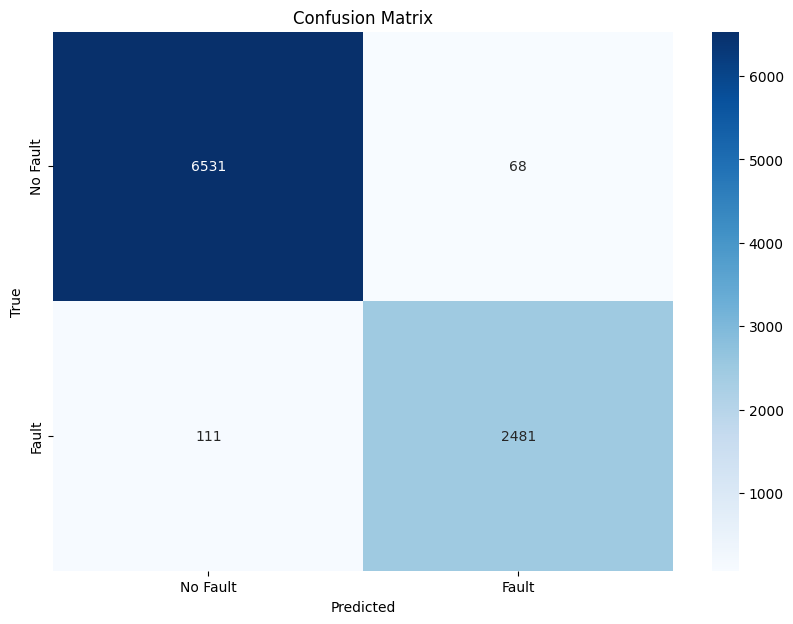

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Fault'], yticklabels=['No Fault', 'Fault'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##  AUC/ROC eğrisi

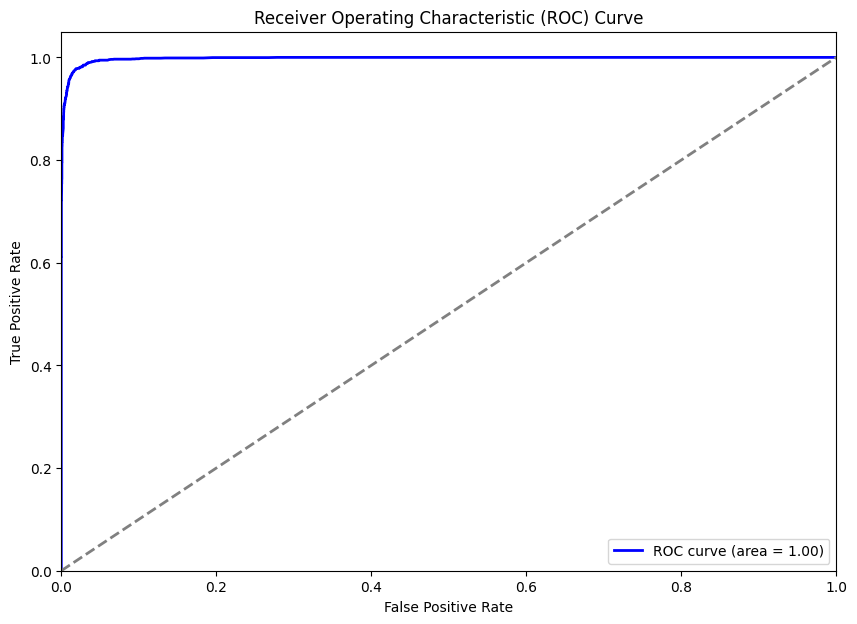

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
# AUC/ROC eğrisi
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Since Feature engineering suitable for the time series problem was performed, a very good binary classification result was obtained with the Random forest algorithm.
## Obtained results: 
- Accuracy: 98%  
- Precision: For 0: 98% | For 1: 97%  
- Recall: For 0: 99% | For 1: 96%   
- F1-score: For 0: 99% | For 1: 97%  
- For the 9191 sample test, 6599 of the predictions are labeled as 0, and 2592 of the predictions are labeled as 1.